# Min / Max Forecast

In [20]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta  

In [21]:
next_days = 30
now = datetime.now()

In [22]:
cycle_times = [2, 3, 5, 8, 3, 5 , 6, 2, 8, 1, 4, 3, 1]

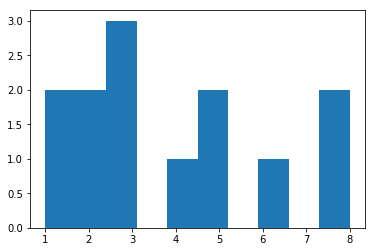

In [23]:
plt.hist(cycle_times);

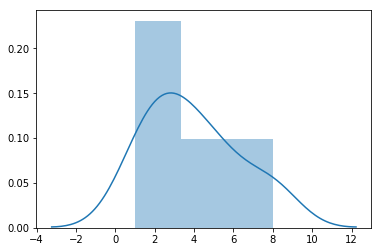

In [24]:
sns.distplot(cycle_times)

In [25]:
min(cycle_times), max(cycle_times)

(1, 8)

In [26]:
def cumulative_sum(next_days, cycle_times, selector):
    total = []
    for i, e in enumerate(range(next_days)):
        if i == 0:
            total.append(selector(cycle_times))
        else:
            total.append(selector(cycle_times) + total[i-1])
    return total

In [27]:
cumulative_sum_min = cumulative_sum(next_days, cycle_times, min)
cumulative_sum_max = cumulative_sum(next_days, cycle_times, max)

In [28]:
x = [x for x in range(next_days)]

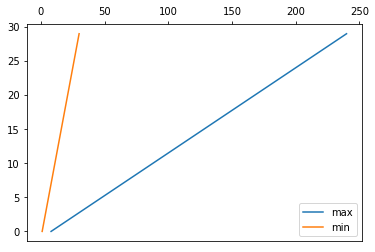

In [29]:
fig, ax = plt.subplots()
plt.plot(cumulative_sum_max, x, label='max')
plt.plot(cumulative_sum_min, x, label='min')
plt.legend(loc='best')

ax.xaxis.tick_top()

In [30]:
sum_min_days = max(cumulative_sum_min)
sum_max_days = max(cumulative_sum_max)
sum_min_days, sum_max_days

(30, 240)

In [31]:
now.strftime('Start date %d %b %Y')

'Start date 21 Feb 2018'

In [32]:
min_end_date = now + timedelta(days=sum_min_days)
min_end_date.strftime('Best case %d %b %Y')

'Best case 23 Mar 2018'

In [33]:
max_end_date = now + timedelta(days=sum_max_days) 
max_end_date.strftime('Worst case %d %b %Y')

'Worst case 19 Oct 2018'